<a href="https://colab.research.google.com/github/RichardXiao13/Google_Code_In/blob/master/Polynomial_Regression_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Polynomial Regression?**

---
Polynomial Regression is finding the relationship between the independent and dependent variables. The difference between Linear Regression and Polynomial Regression is that Linear Regression finds the best fit line according to the data. Therefore, this is only helpful for us when we have data that follows a linear path. In Polynomial Regression, we are able to find more complex functions that model our data. In both regressions, the weights are kept linear, so we say that the models we create are *linear* models. Below, some random data is generated to demonstrate. We will use numpy to generate the random data. Then we will create a function, y, that takes the data as input.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

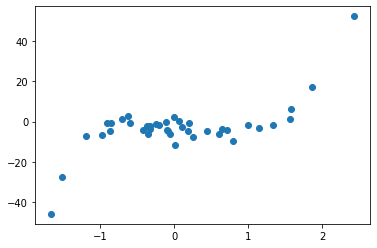

In [0]:
np.random.seed(5)

original_x = np.random.normal(0, 1, 40)
x = np.copy(original_x)
y = 1.2 * (x**5) - 2.5 * (x**4) + 3 * (x**3) + 0.8 * (x**2) - 3*x + np.random.normal(-3, 3, 40)

plt.scatter(x, y)
plt.show()

# **Linear Regression**

---


We can clearly see that a line would not model our data accurately. However, let's try and find the best fit line for this. Here, we will import LinearRegression from sklearn which allows us to make a Linear Regression model. It also allows us to make Polynomial Regression models because linear refers to the weights of the function.

In [0]:
from sklearn.linear_model import LinearRegression

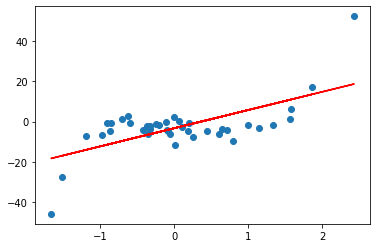

In [0]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

lin_model = LinearRegression()
lin_model.fit(x, y)
predicted_vals = lin_model.predict(x)

plt.scatter(original_x, y)
plt.plot(x, predicted_vals, color="r")
plt.show()

# **Basics of Polynomial Regression**

---


In Linear Regression, the model follows this:



> $y = a_{0} + a_{1}x + a_{2}x + ...+ a_{n}x_{n}$

In Polynomial Regression, the model looks like this:

> $y = a_{0} + a_{1}x + a_{2}x^2 + ... + a_{n}x^n$

In both models, the $a$ coefficients are weights. The difference is that in the Polynomial regression, the weights are assigned to features/inputs of different orders which are seen as the $x$ terms. The expression for a Polynomial Regression function can be rewritten as $a = (X^TX)^{-1}X^Ty$ where $a$ is a vector corresponding to the weights, $y$ is a vector corresponding to the outputs, and $X$ is a matrix corresponding to each feature and their higher order counterparts. In machine learning, the computer adjusts the values of the weights such that the loss between the real output values and the predicted output values are at a minimum. This is done through gradient descent where the computer repeatedly tries to find a minimum in the loss function by going in the direction of the function where loss decreases the most (steepest descent).


# **Polynomial Regression**

---


Now, let's try and perform Polynomial Regression to get a more accurate representation of the data. We will import PolynomialFeatures from sklearn which allows us to create a function of any degree. First we'll try using a function of degree two. The fit_transform method transforms the input features to an array where each row is a feature raised to each power from 0 to the degree we specified in our function. Then, we will train the model to find the best function of degree two for our data and plot the results.

In [0]:
from sklearn.preprocessing import PolynomialFeatures
import operator

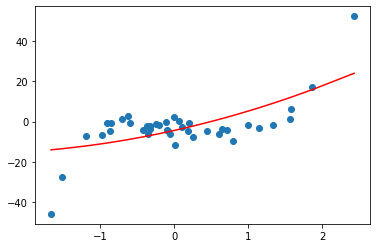

In [0]:
function = PolynomialFeatures(2)
x_vals_deg2 = function.fit_transform(x)
deg2_model = LinearRegression()
deg2_model.fit(x_vals_deg2, y)
y_pred_deg2 = deg2_model.predict(x_vals_deg2)
sort_key = operator.itemgetter(0)
plt.scatter(x, y)
values = zip(x, y_pred_deg2)
sort_values = sorted(values, key=sort_key)
x, y_pred_deg2 = zip(*sort_values)
plt.plot(x, y_pred_deg2, color="r")
plt.show()

We see that the function of degree two performs better, but we see that it doesn't capture the overall pattern of the data. Now, we can try a higher order polynomial. Below, we'll use a degree of three and plot the results as shown above.

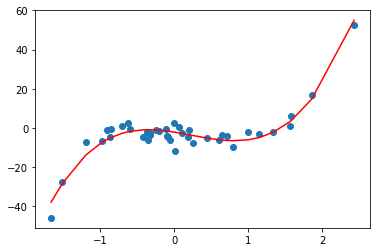

In [0]:
x = np.copy(original_x)
x = x[:, np.newaxis]

function = PolynomialFeatures(3)
x_vals_deg3 = function.fit_transform(x)
deg3_model = LinearRegression()
deg3_model.fit(x_vals_deg3, y)
y_pred_deg3 = deg3_model.predict(x_vals_deg3)
plt.scatter(original_x, y)
values = zip(x, y_pred_deg3)
sort_values = sorted(values, key=sort_key)
x, y_pred_deg3 = zip(*sort_values)
plt.plot(x, y_pred_deg3, color="r")
plt.show()

That's pretty good! The function with degree three was able to generalize the data very well. Now let's try performing the same on some new data.

# **Position Vs. Salaries**

---


 Below, we will be using a Position vs Salaries file in this Colab. We will extract the information from the csv file and plot it on a graph to visualize.

In [0]:
import pandas as pd

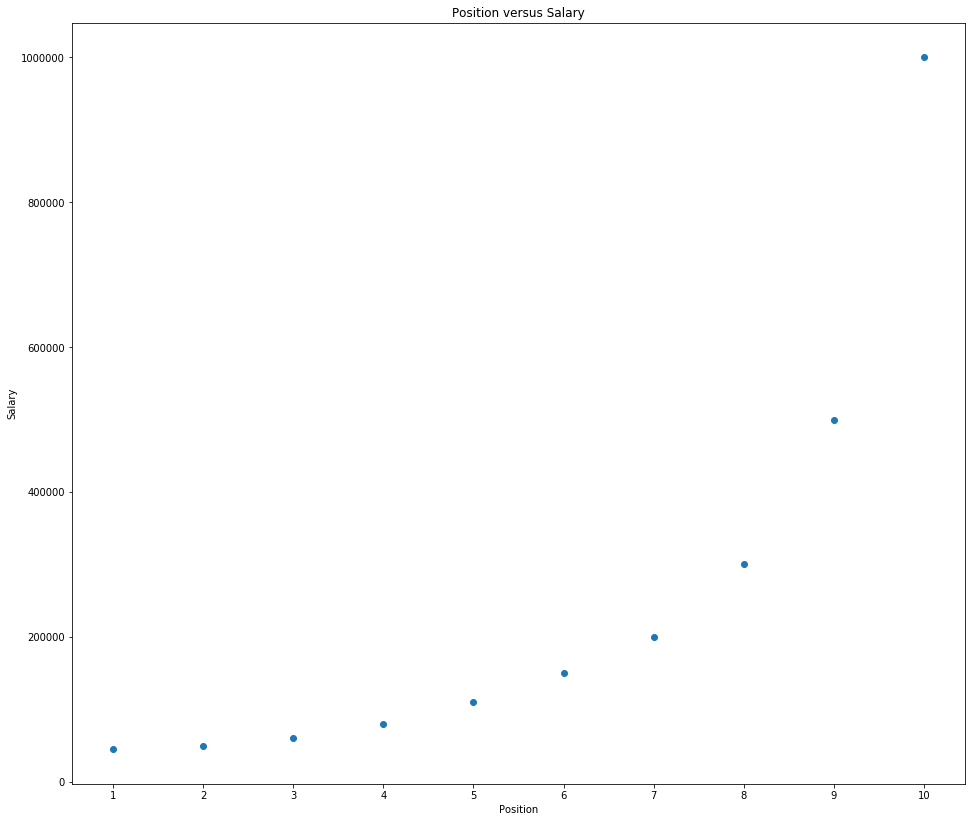

In [0]:
position_salaries = pd.read_csv("/content/Position_Salaries.csv")

original_position = position_salaries["Level"]
position = np.copy(original_position)
salaries = position_salaries["Salary"]
plt.figure(figsize=(16, 14))
plt.scatter(original_position, salaries)
plt.xlabel("Position")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel("Salary")
plt.title("Position versus Salary")
plt.show()

position = position[:, np.newaxis]
salaries = salaries[:, np.newaxis]

in this cell, we will try a function of degree four and plot the results.

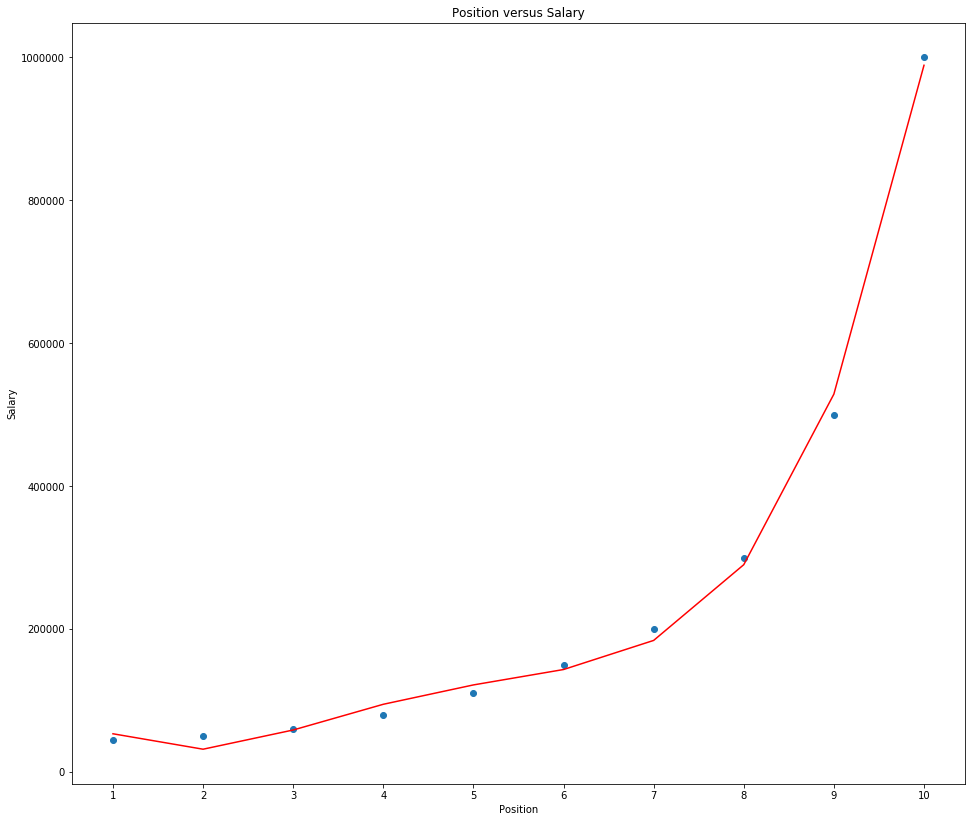

In [0]:
function = PolynomialFeatures(4)
position_deg2 = function.fit_transform(position)
pos_vs_sal_model = LinearRegression()
pos_vs_sal_model.fit(position_deg2, salaries)
salaries_deg2 = pos_vs_sal_model.predict(position_deg2)

plt.figure(figsize=(16, 14))
plt.scatter(original_position, salaries)
values = zip(position, salaries_deg2)
sort_values = sorted(values, key=sort_key)
position, salaries_deg2 = zip(*sort_values)
plt.plot(original_position, salaries_deg2, color="r")
plt.xlabel("Position")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.ylabel("Salary")
plt.title("Position versus Salary")
plt.show()

It seems that a function of degree four is able to generalize our data pretty well.

# **Overfitting and Underfitting**

---


If we wanted, we could increase the degree of the polynomial to whatever number we like. However, when we do this, the model we create begins to "memorize" the data by passing through every point. Overfitting should be avoided as it is not good for generalizing data because when our model tries to predict unseen data, it will have a very large loss as it only knew what to predict for its training data. Even though it is necessary to not overfit our model, we must also try and not underfit our data. Underfitting is the exact opposite of overfitting but also has the same consequences. Underfitting is when our model doesn't capture enough of our data and results in an oversimplified view of our data which can also lead to large losses. This can be seen in the second and third graphs of this colab.